In [402]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 10)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [403]:
train_data = pd.read_csv('train-2.csv')
test_data = pd.read_csv('test-2.csv')
train_data['Value(in Euro)'] = train_data['Value(in Euro)'].astype(str).astype(int)
train_data.shape




# test_data.dtypes.reset_index().T
# train_data.dtypes.reset_index().T

(18000, 35)

In [404]:
# cols = train_data.dtypes == 'object'
# print(cols)
trainNew = train_data[[ 'Value(in Euro)','Overall','International Reputation',
                       'Wage(in Euro)','Release Clause','Dribbling Total']].copy()
testNew = test_data[['Overall','International Reputation','Wage(in Euro)','Release Clause',
                    'Dribbling Total']].copy()


trainNew['Value(in Euro)'] = trainNew['Value(in Euro)'].astype(str).astype(int)

# import pandas as pd
# import numpy as np
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# X = trainNew.iloc[:,0:20]  #independent columns
# y = trainNew.iloc[:,0]    #target column i.e price range
# #apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features


In [405]:
# norm = preprocessing.normalize(trainNew)
# norm = norm.astype(float)
# norm = pd.DataFrame(norm)
# print(norm)


<AxesSubplot: >

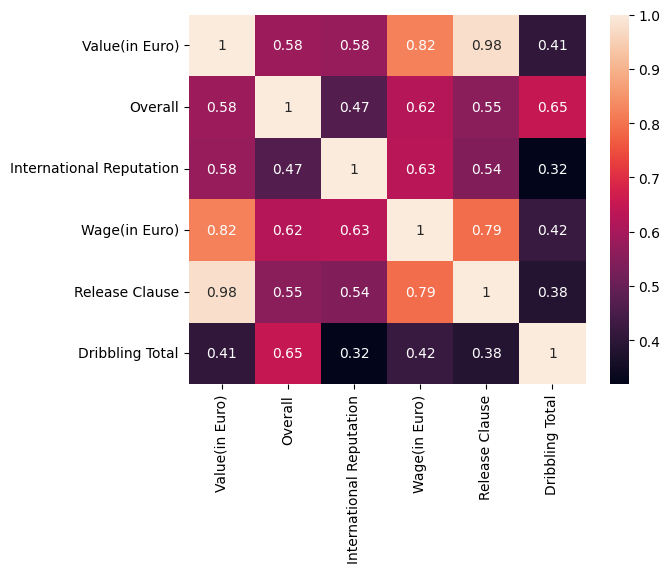

In [406]:
sns.heatmap(trainNew.corr(),annot=True)

In [407]:
# #Random Forest
# from sklearn.ensemble import RandomForestRegressor 
# #Linear Regression
# from sklearn.linear_model import LinearRegression



# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(trainNew, trainNew['Value(in Euro)'])
# # print(model.feature_importances_)
# print(model.score(trainNew, trainNew['Value(in Euro)']))

# sample_data = pd.read_csv('sample_submission-2.csv')
# sample_data.head()
# test_data['Value(in Euro)'] = 0
# # sample_data['Value(in Euro)'] = sample_data['Value(in Euro)'].astype(str).astype(int)
# sample_data['Value(in Euro)'] = model.predict(test_data[['Value(in Euro)','Overall', 'BaseStats', 'Dribbling Total',
#        'Passing Total', 'Shooting Total', 'Skill Moves', 'Physicality Total',
#        'Pace Total', 'Defending Total', 'Weak Foot Rating', 'Weight(in kg)',
#        'Age', 'Height(in cm)']])
# sample_data.to_csv('sample_submission-2.csv', index=False)


In [408]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

train_data,val_data,train_labels,val_labels = train_test_split(trainNew.drop('Value(in Euro)',axis = 1),trainNew['Value(in Euro)'],test_size=0.01,random_state=42)


model = RandomForestRegressor()

model.fit(train_data,train_labels)

# val_labels = model.predict(val_data)

predicted_labels = model.predict(val_data)
print(model.score(train_data,train_labels))
mean_squared_error(predicted_labels,val_labels)


0.99702139877377


500565825872.54645

In [409]:

submission = model.predict(testNew)


sample_data = pd.read_csv('sample_submission-2.csv')
sample_data['Value(in Euro)'] = submission
sample_data.to_csv('sample_submission-2.csv', index=False)